In [1]:
import pandas as pd
from tqdm import tqdm

# 전처리

In [4]:
df_news = pd.read_csv('./data/news_2024.csv')

df_news

,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·이재명 대권 경쟁도 치열",지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...
1,"“큰 싸움 벌일 것”…이낙연, 이재명과 만남 이틀만에 창당 선언","이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사 ..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 내...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 총...
4,총선 모드 국민의힘…한동훈표 정치 구체화,“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제\...
...,...,...
71144,‘박근혜 복심’ 유영하 공천…이채익 등 현역 6명 물갈이,한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 방...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[4.10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 듀오..."
71146,"국힘 한기호 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 출..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과는..."


In [5]:
df_news[df_news['content'] == 'No content available']

,title,content
3820,2024 강원 동계 청소년 올림픽 스피드스케이팅 경기장 점검 나선 한덕수 총리,No content available
4096,[포토]인사말하는 김예지 의원,No content available
4151,"""윤 대통령 입당 후 국힘 광주시당원 16배 늘었다""",No content available
5026,"화섬식품노조, '오리온 부당노동행위' 관련 기자회견",No content available
5245,"신원식 국방부 장관, 임시국무회의 입장",No content available
...,...,...
62263,"한동훈 ""이재명과 1대1 생방송 토론 응하겠다""",No content available
62626,매크로 활용 입장권 부정 판매하면 징역 1년 또는 벌금 1천만원,No content available
62719,"녹색정의당, 비례의석 축소 양당 담합 규탄 피켓팅",No content available
62850,인사 나누는 김기현 의원과 김태호 의원,No content available


## 필요없는 문자 제거

In [6]:
df_news = df_news[df_news['content'] != 'No content available']
df_news = df_news.drop_duplicates(subset = ['title'])
df_news = df_news.copy()
df_news

,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·이재명 대권 경쟁도 치열",지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...
1,"“큰 싸움 벌일 것”…이낙연, 이재명과 만남 이틀만에 창당 선언","이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사 ..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 내...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 총...
4,총선 모드 국민의힘…한동훈표 정치 구체화,“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제\...
...,...,...
71144,‘박근혜 복심’ 유영하 공천…이채익 등 현역 6명 물갈이,한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 방...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[4.10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 듀오..."
71146,"국힘 한기호 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 출..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과는..."


In [7]:
df_news['content'] = df_news['content'].str.replace('\n', ' ')
df_news['content'] = df_news['content'].str.replace('/', ' ')


df_news

,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·이재명 대권 경쟁도 치열",지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...
1,"“큰 싸움 벌일 것”…이낙연, 이재명과 만남 이틀만에 창당 선언","이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사 ..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 내...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 총...
4,총선 모드 국민의힘…한동훈표 정치 구체화,“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제 ...
...,...,...
71144,‘박근혜 복심’ 유영하 공천…이채익 등 현역 6명 물갈이,한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 방...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[4.10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 듀오..."
71146,"국힘 한기호 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 출..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과는..."


## 후보 이름을 당으로 변환

In [10]:
people_df = pd.read_csv('./data/news_2024_후보.csv')
people_df['party'] = people_df['party'].str.strip()
people_df

,name,party
0,김성회,더불어민주당
1,김성남,국민의힘
2,한창섭,국민의힘
3,심상정,녹색정의당
4,김재준,더불어민주당
...,...,...
1347,정상진,조국혁신당
1348,남지은,조국혁신당
1349,서용선,조국혁신당
1350,양소영,조국혁신당


In [11]:
# 사전으로 만들기(key : 이름, value : 당)

name_party_dic = dict(zip(people_df['name'], people_df['party']))

name_party_dic

{'김성회': '더불어민주당',
 '김성남': '국민의힘',
 '한창섭': '국민의힘',
 '심상정': '녹색정의당',
 '김재준': '더불어민주당',
 '이기헌': '더불어민주당',
 '정진경': '더불어민주당',
 '홍정민': '더불어민주당',
 '김종혁': '국민의힘',
 '김근복': '우리공화당',
 '한준호': '더불어민주당',
 '장석환': '국민의힘',
 '김영환': '더불어민주당',
 '장철영': '더불어민주당',
 '이용우': '더불어민주당',
 '박재이': '국민의힘',
 '최현철': '국민의힘',
 '김형진': '국민의힘',
 '이영희': '국민의힘',
 '진현국': '국민의힘',
 '김용태': '국민의힘',
 '임오경': '더불어민주당',
 '김기남': '국민의힘',
 '권태진': '국민의힘',
 '강신성': '더불어민주당',
 '김혜민': '더불어민주당',
 '양기대': '더불어민주당',
 '김남희': '더불어민주당',
 '전동석': '국민의힘',
 '소병훈': '더불어민주당',
 '이현철': '더불어민주당',
 '함경우': '국민의힘',
 '성수희': '개혁신당',
 '박덕동': '더불어민주당',
 '안태준': '더불어민주당',
 '박해광': '국민의힘',
 '김재경': '국민의힘',
 '황명주': '국민의힘',
 '조억동': '국민의힘',
 '윤호중': '더불어민주당',
 '송재욱': '국민의힘',
 '송진호': '국민의힘',
 '정경진': '국민의힘',
 '전지현': '국민의힘',
 '박영순': '새로운미래',
 '나태근': '국민의힘',
 '김구영': '개혁신당',
 '이학영': '더불어민주당',
 '금병찬': '국민의힘',
 '박재영': '국민의힘',
 '최진학': '국민의힘',
 '송지원': '더불어민주당',
 '김주영': '더불어민주당',
 '김민': '국민의힘',
 '박진호': '국민의힘',
 '하금성': '새로운미래',
 '기경환': '더불어민주당',
 '김준현': '더불어민주당',
 '이회수': '더불어민주당',
 '박

In [13]:
df_news = df_news.dropna()
df_news

,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·이재명 대권 경쟁도 치열",지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...
1,"“큰 싸움 벌일 것”…이낙연, 이재명과 만남 이틀만에 창당 선언","이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사 ..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 내...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 총...
4,총선 모드 국민의힘…한동훈표 정치 구체화,“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제 ...
...,...,...
71144,‘박근혜 복심’ 유영하 공천…이채익 등 현역 6명 물갈이,한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 방...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[4.10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 듀오..."
71146,"국힘 한기호 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 출..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과는..."


In [14]:
# title 열의 각 값에 대해 사람 이름을 당의 이름으로 변경

for idx, row in tqdm(df_news.iterrows()):
    for name, party in name_party_dic.items():
        if name in row['title']:
            df_news.at[idx, 'title'] = row['title'].replace(name, party)
            
        elif name in row['content']:
            df_news.at[idx, 'content'] = row['content'].replace(name, party)

54010it [06:27, 139.27it/s]


In [15]:
df_news

,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·더불어민주당 대권 경쟁도 치열",지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...
1,"“큰 싸움 벌일 것”…이낙연, 더불어민주당과 만남 이틀만에 창당 선언","이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사 ..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 내...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 총...
4,총선 모드 국민의힘…한동훈표 정치 구체화,“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제 ...
...,...,...
71144,‘박근혜 복심’ 국민의힘 공천…이채익 등 현역 6명 물갈이,한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 방...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[4.10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 듀오..."
71146,"국힘 국민의힘 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 출..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과는..."


## 문장으로 나누기

In [16]:
df_news['content'] = df_news['content'].str.split('.')

df_news

C:\Users\mit005\AppData\Local\Temp\ipykernel_4312\1365410498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['content'] = df_news['content'].str.split('.')


,title,content
0,"총선 D-100, 여야 지지율 초접전…한동훈·더불어민주당 대권 경쟁도 치열",[지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국...
1,"“큰 싸움 벌일 것”…이낙연, 더불어민주당과 만남 이틀만에 창당 선언","[이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",[MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 ...
3,정의당·녹색당 “낡은 정치구도 바꿔야”,[정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 ...
4,총선 모드 국민의힘…한동훈표 정치 구체화,[“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제...
...,...,...
71144,‘박근혜 복심’ 국민의힘 공천…이채익 등 현역 6명 물갈이,[한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 ...
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[[4, 10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 ..."
71146,"국힘 국민의힘 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","[한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 ..."
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","[양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과..."


## 당에 대한 문장 나누기

In [17]:
party_names = list(people_df['party'].unique())

party_names

['더불어민주당',
 '국민의힘',
 '녹색정의당',
 '우리공화당',
 '개혁신당',
 '새로운미래',
 '자유통일당',
 '진보당',
 '신한반도당',
 '자유민주당',
 '소나무당',
 '노동당',
 '무소속',
 '새진보연합',
 '국민주권당',
 '내일로미래로',
 '국민의미래',
 '한국국민당',
 '한국농어민당',
 '조국혁신당']

당에 관한 기사만

In [18]:
# 당에 관한 기사만

party_sentences = []
party_lst = []

for data in tqdm(df_news.iloc[:, 1]):
    res = []
    party_name = []
    for j in range(len(data)):
        for party in party_names:
            if party in data[j]:
                party_name.append(party)
                res.append(data[j])
        else:
            continue
    party_sentences.append(res)
    party_lst.append(party_name)

df_news.loc[:, 'party_content'] = party_sentences
df_news.loc[:, 'party_name'] = party_lst

100%|█████████████████████████████████████████████████████████████████████████| 54010/54010 [00:02<00:00, 19313.33it/s]
C:\Users\mit005\AppData\Local\Temp\ipykernel_4312\1535786686.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news.loc[:, 'party_content'] = party_sentences
C:\Users\mit005\AppData\Local\Temp\ipykernel_4312\1535786686.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news.loc[:, 'party_name'] = party_lst


In [19]:
df_news

,title,content,party_content,party_name
0,"총선 D-100, 여야 지지율 초접전…한동훈·더불어민주당 대권 경쟁도 치열",[지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국...,[지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국...,"[더불어민주당, 국민의힘, 새로운미래, 더불어민주당, 국민의힘, 국민의힘, 국민의힘..."
1,"“큰 싸움 벌일 것”…이낙연, 더불어민주당과 만남 이틀만에 창당 선언","[이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사...","[이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사...","[더불어민주당, 더불어민주당, 더불어민주당, 새로운미래, 국민의힘, 개혁신당, 국민..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",[MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 ...,[com *재판매 및 DB 금지[서울=뉴시스] 진보당 기자 = 1일 발표된 언론사들...,"[진보당, 더불어민주당, 국민의힘, 국민의힘]"
3,정의당·녹색당 “낡은 정치구도 바꿔야”,[정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 ...,"[진보당은 이날 따로 마석모란공원을 찾았다, 국민의힘 진보당 상임대표는 “새해에도...","[진보당, 국민의힘, 진보당]"
4,총선 모드 국민의힘…한동훈표 정치 구체화,[“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제...,[“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제...,"[더불어민주당, 국민의힘, 국민의힘, 국민의힘]"
...,...,...,...,...
71144,‘박근혜 복심’ 국민의힘 공천…이채익 등 현역 6명 물갈이,[한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 ...,[한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 ...,"[국민의힘, 국민의힘, 더불어민주당, 국민의힘, 국민의힘]"
71145,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[[4, 10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 ...","[원주는 그간 민주당의 우세지역이었지만, 20대 대선과 8회 지방선거와 함께 치러진...","[국민의힘, 국민의힘, 국민의힘, 더불어민주당, 국민의힘, 더불어민주당, 국민의힘,..."
71146,"국힘 국민의힘 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","[한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 ...","[한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 ...",[국민의힘]
71147,"공천 막바지 접어든 국민의힘, 관전 포인트는?","[양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과...","[양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과...","[국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의..."


In [20]:
df_news = df_news[df_news['party_content'].apply(lambda x : len(x) > 0)]
df_news = df_news.reset_index(drop = True)
df_news

,title,content,party_content,party_name
0,"총선 D-100, 여야 지지율 초접전…한동훈·더불어민주당 대권 경쟁도 치열",[지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국...,[지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국...,"[더불어민주당, 국민의힘, 새로운미래, 더불어민주당, 국민의힘, 국민의힘, 국민의힘..."
1,"“큰 싸움 벌일 것”…이낙연, 더불어민주당과 만남 이틀만에 창당 선언","[이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사...","[이낙연, 지지자들과 신년 산행“국민께 새 선택지 드려야 해”창당 질문에 “고별인사...","[더불어민주당, 더불어민주당, 더불어민주당, 새로운미래, 국민의힘, 개혁신당, 국민..."
2,"4월 총선 '정부 견제론', '정부 지원론'에 10~12%p 앞서[코리아리서치·입소스]",[MBC·SBS 신년 조사서 '정부견제론' 10%p↑정당지지도는 민주당이 오차범위 ...,[com *재판매 및 DB 금지[서울=뉴시스] 진보당 기자 = 1일 발표된 언론사들...,"[진보당, 더불어민주당, 국민의힘, 국민의힘]"
3,정의당·녹색당 “낡은 정치구도 바꿔야”,[정의당과 녹색당은 갑진년 새해 첫날 신년인사회를 함께 열고 선거연합정당을 추진해 ...,"[진보당은 이날 따로 마석모란공원을 찾았다, 국민의힘 진보당 상임대표는 “새해에도...","[진보당, 국민의힘, 진보당]"
4,총선 모드 국민의힘…한동훈표 정치 구체화,[“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제...,[“동료 시민 정책” 거듭 강조신년인사회 이어 대전·대구행대통령 리스크 탈피는 과제...,"[더불어민주당, 국민의힘, 국민의힘, 국민의힘]"
...,...,...,...,...
48400,‘박근혜 복심’ 국민의힘 공천…이채익 등 현역 6명 물갈이,[한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 ...,[한동훈 국민의힘 비상대책위원장(앞줄 왼쪽 둘째)이 5일 충북 청주시 서원대학교를 ...,"[국민의힘, 국민의힘, 더불어민주당, 국민의힘, 국민의힘]"
48401,"표심 나침반 춘천·원주, 여야 강원 격전지 고삐","[[4, 10총선, 강원의선택] '수성 vs 탈환' 후보간 경쟁 격화현역 + 원외 ...","[원주는 그간 민주당의 우세지역이었지만, 20대 대선과 8회 지방선거와 함께 치러진...","[국민의힘, 국민의힘, 국민의힘, 더불어민주당, 국민의힘, 더불어민주당, 국민의힘,..."
48402,"국힘 국민의힘 4선 도전 공식 선언 ""군인·가족 처우개선 올인할 것""","[한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 ...","[한기호(사진) 국민의힘 춘천·철원·화천·양구을 국회의원이 5일 춘천시청에서 ""군 ...",[국민의힘]
48403,"공천 막바지 접어든 국민의힘, 관전 포인트는?","[양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과...","[양지, 尹 참모 출신·박근혜 측근 공천 여부에 주목하태경·이혜훈·이영 3파전 결과...","[국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의힘, 국민의..."


In [21]:
# 리스트 풀기
senti_df = pd.DataFrame(columns=['party_content', 'party_name'])

# 기존 데이터프레임을 순회하면서 리스트 값을 분리하여 새로운 행으로 추가
for idx, row in tqdm(df_news.iterrows()):
    for content, party in zip(row['party_content'], row['party_name']):
        senti_df = pd.concat([senti_df, pd.DataFrame({'party_content': [content], 'party_name': [party]})])

48405it [15:30, 52.05it/s] 


In [22]:
senti_df = senti_df.reset_index(drop = True)
senti_df

,party_content,party_name
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘
...,...,...
187132,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속
187133,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘
187134,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘
187135,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘


In [99]:
# senti_df = senti_df[~senti_df['party_content'].str.contains('네이버 메인에서')]
# senti_df = senti_df.reset_index(drop = True)

In [23]:
lst = []
for ind, row in tqdm(senti_df.iterrows()):
    content = row['party_content']
    name = row['party_name']
    for party in party_names:
        if name != party:
            content = content.replace(party, '')
    lst.append(content)

senti_df['party_content'] = lst

187137it [00:16, 11229.07it/s]


In [25]:
senti_df

,party_content,party_name
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘
...,...,...
187132,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속
187133,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘
187134,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘
187135,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘


In [29]:
senti_df.to_csv('./data/news_2024_긍정부정_전.csv', index = False)

#  긍정/부정 모델

## smote

In [30]:
train_df = pd.read_csv('./data/news_2020_긍정부정결과_BertTokenizer.csv') # 2020년
test_df = pd.read_csv('./data/news_2024_긍정부정_전.csv')

In [42]:
# 긍정, 부정 확인

print('긍정 개수 : {}'.format(train_df['label'].value_counts()[1]))
print('부정 개수 : {}'.format(train_df['label'].value_counts()[0]))

긍정 개수 : 63405
부정 개수 : 180021


In [34]:
test_df = test_df[['party_content', 'party_name']]

test_df

,party_content,party_name
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘
...,...,...
187132,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속
187133,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘
187134,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘
187135,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘


In [35]:
X_train = train_df['party_content']
y_train = train_df['label']

X_test = test_df['party_content']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 생성
tfidf_vectorizer = TfidfVectorizer()

# TF-IDF를 사용하여 텍스트 데이터를 벡터 형태로 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test) 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size = 0.2, random_state = 42)

In [43]:
print('Train 데이터 셋 : {}, {}'.format(X_train.shape, y_train.shape))
print('Val 데이터 셋   : {},  {}'.format(X_val.shape, y_val.shape))

Train 데이터 셋 : (194740, 221593), (194740,)
Val 데이터 셋   : (48686, 221593),  (48686,)


In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

y_resampled.value_counts()

label
0    144023
1    144023
Name: count, dtype: int64

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
#     ('tfidf', TfidfVectorizer()),  # TF-IDF 변환
    ('clf', LogisticRegression())  # 로지스틱 회귀 분류기
])

pipeline.fit(X_resampled, y_resampled)

# validation 세트에 대한 예측 결과 가져오기
y_pred_val = pipeline.predict(X_val)

Validation Accuracy: 0.9446658176888634
Confusion Matrix:
[[34085  1913]
 [  781 11907]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     35998
           1       0.86      0.94      0.90     12688

    accuracy                           0.94     48686
   macro avg       0.92      0.94      0.93     48686
weighted avg       0.95      0.94      0.95     48686



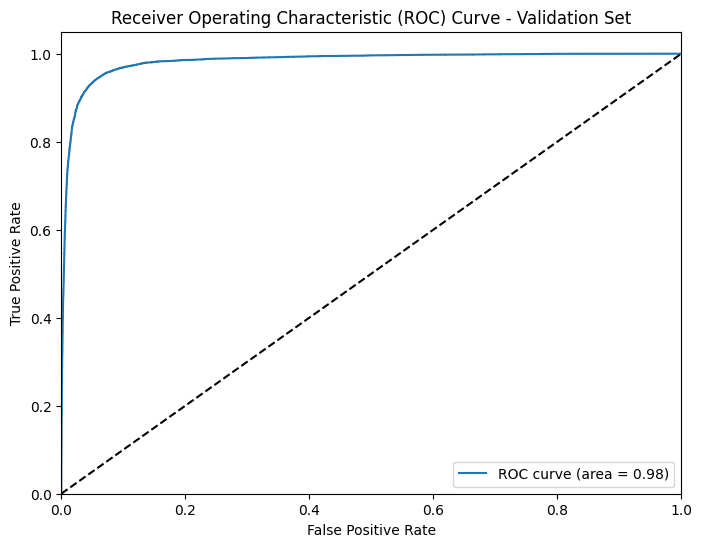

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 정확도 계산
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# 혼동 행렬(confusion matrix) 계산
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix:")
print(conf_matrix)

# 분류 보고서(classification report) 출력
class_report = classification_report(y_val, y_pred_val)
print("Classification Report:")
print(class_report)

# ROC 곡선 및 AUC 계산
y_pred_proba_val = pipeline.predict_proba(X_val)[:, 1]  # 양성 클래스에 대한 확률 추출
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

# ROC 곡선 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label='ROC curve (area = %0.2f)' % roc_auc_val)
plt.plot([0, 1], [0, 1], 'k--')  # 랜덤 모델의 ROC 곡선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")

In [41]:
pipeline.fit(X_resampled, y_resampled)

predicted_label = pipeline.predict(X_test_tfidf)

test_df['label'] = predicted_label

test_df['label'].value_counts()

label
0    123328
1     63809
Name: count, dtype: int64

In [46]:
test_df.to_csv('./data/news_2024_긍정부정_결과.csv', index = False)

In [48]:
test_df

,party_content,party_name,label
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당,1
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘,1
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래,1
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당,0
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘,0
...,...,...,...
187132,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속,0
187133,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘,0
187134,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘,0
187135,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘,0
